# Introduction to Data Science
## Homework 3

Student Name: Manuel Serrano Rebuelta

Student Netid: msr542
***

### Part 1
Assume that $X$ and $Y$ are discrete random variables. The formulas for Mutual Information, Entropy and Conditional Entropy are given by:

$$\text{Mutual Information} = \sum_{y \in Y} \sum_{x \in X} p(x, y) \cdot log\frac{p(x, y)}{p(x)p(y)}$$

$$\text{Entropy} = H(Y) = -\sum_{y \in Y} p(y) \cdot log(p(y))$$

$$\text{Conditional Entropy} = H(Y \mid X) = \sum_{x \in X} p(x) \cdot H(Y \mid X = x)$$

Show mathematically that $\text{Mutual Information} = \text{Information Gain}$, where $\text{Information Gain} = H(Y) – H(Y \mid X)$. Give the derivation below (note, this can be done using Latek math notation, which renders nicely. See above. Feel free to do it by hand and submit an image of your proof).

\begin{align}
\text{Information Gain} &= H(Y) - H(Y|X) \\
& = -\sum_{y\in Y}p(y)\log(p(y))-\sum_{x\in X}p(x)H(Y|X=x)\\
& = \sum_{x\in X}p(x)\sum_{y\in Y}p(y|x)\log p(y|x)-\sum_{y\in Y}p(y)\log(p(y))\\
& = \sum_{x\in X}\sum_{y\in Y}p(x,y)\log p(y|x)-\sum_{x\in X}\sum_{y\in Y}p(x,y)\log(p(y))\\
& = \sum_{x\in X}\sum_{y\in Y}(p(x,y)\log p(y|x)-p(x,y)\log(p(y)))\\
& = \sum_{x\in X}\sum_{y\in Y}\left(p(x,y)\log \frac{p(y|x)}{p(y)}\right)\\
& = \sum_{x\in X}\sum_{y\in Y}\left(p(x,y)\log \frac{p(x,y)}{p(x)p(y)}\right)\\
& = \text{Mutual Information} 
\end{align}

### Part 2 - Preparing a Training Set and Training a Decision Tree
This is a hands-on task where we build a predictive model using Decision Trees discussed in class. For this part, we will be using the data in `cell2cell_data.csv`.

These historical data consist of 39,859 customers: 19,901 customers that churned (i.e., left the company) and 19,958 that did not churn (see the `"churndep"` variable). Here are the data set's 11 possible predictor variables for churning behavior: 

```
Pos.  Var. Name  Var. Description
----- ---------- --------------------------------------------------------------
1     revenue    Mean monthly revenue in dollars
2     outcalls   Mean number of outbound voice calls
3     incalls    Mean number of inbound voice calls
4     months     Months in Service
5     eqpdays    Number of days the customer has had his/her current equipment
6     webcap     Handset is web capable
7     marryyes   Married (1=Yes; 0=No)
8     travel     Has traveled to non-US country (1=Yes; 0=No)
9     pcown      Owns a personal computer (1=Yes; 0=No)
10    creditcd   Possesses a credit card (1=Yes; 0=No)
11    retcalls   Number of calls previously made to retention team
```

The 12th column, the target variable `"churndep"`, equals 1 if the customer churned, and 0 otherwise. 

1\. Load the data and prepare it for modeling. Note that the features are already processed for you, so the only thing needed here is split the data into training and testing. Use pandas to create two data frames: train_df and test_df, where train_df has 80% of the data chosen uniformly at random without replacement (test_df should have the other 20%). Also, make sure to write your own code to do the splits. You may use any random() function numpy but DO NOT use the data splitting functions from Sklearn.

In [32]:
import pandas as pd
import numpy as np

my_Data = pd.read_csv("cell2cell_data.csv", names=['revenue', 'outcalls', 'incalls', 'months', 'eqdays', 'webcap', 'marryyes', 'travel', 'pcown', 'creditcd', 'retcalls', 'churndep'])

my_Data_Shuffled = my_Data.sample(frac=1)

train_df = my_Data_Shuffled[:int(len(my_Data.index)*0.8)]
test_df = my_Data_Shuffled[int(len(my_Data.index)*0.8):]

2\. If we had to, how would we prove to ourselves or a colleague that our data was indeed randomly sampled on X? And by prove, I mean empirically, not just showing this person our code. Don't actually do the work, just describe in your own words a test you could here. Hint: think about this in terms of selection bias and use notes from our 2nd lecture.

#### Answer
To prove that our data is actually randomly sampled on X, and that it does not suffer from selection bias, we need to prove that each sample is independent of its set of features. This is, that P(Sample|Features) = P(Sample). In order to accomplish this, one possible approach could be to search for the proportion of people that churned, people married or people with credit cards in my sampled data, and check if these proportions are similar to the porportions in the whole dataset. By doing this, we will ensure that the data has been sampled at random, and the the sampling did not depend on any parameter from the features or labels.
    

3\. Now build and train a decision tree classifier using `DecisionTreeClassifier()` [(manual page)](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) on train_df to predict the `"churndep"` target variable. Make sure to use `criterion='entropy'` when instantiating an instance of `DecisionTreeClassifier()`. For all other settings you should use all of the default options.

In [33]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(criterion = 'entropy')
dtc_fitted = dtc.fit(train_df.drop('churndep',axis=1), train_df['churndep'])

4\. Using the resulting model from 2.2, show a bar plot of feature names and their feature importance (hint: check the attributes of the `DecisionTreeClassifier()` object directly in IPython or check the manual!).

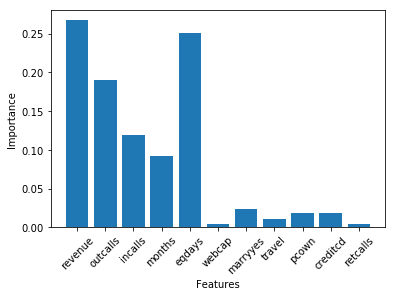

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

a =plt.bar(range(1,len(dtc_fitted.feature_importances_)+1),dtc_fitted.feature_importances_)
plt.xticks(range(1,len(dtc_fitted.feature_importances_)+1), list(train_df.drop('churndep',axis=1)),rotation=45);
plt.xlabel('Features');
plt.ylabel('Importance');

#help(DecisionTreeClassifier())

5\. Is the relationship between the top 3 most important features (as measured here) negative or positive? If your marketing director asked you to explain the top 3 drivers of churn, how would you interpret the relationship between these 3 features and the churn outcome?  What "real-life" connection can you draw between each variable and churn?

In [42]:
# The realtion between two variables can be best analyzed using the correlation coefficient. Let's take a closer look
# at these coefficients amonst all:
print('Correlation between revenue and churndep:', np.corrcoef(train_df['revenue'],train_df['churndep'])[1][0])
print('Correlation between outcalls and churndep:', np.corrcoef(train_df['outcalls'],train_df['churndep'])[1][0])
print('Correlation between eqdays and churndep:', np.corrcoef(train_df['eqdays'],train_df['churndep'])[1][0])

Correlation between revenue and churndep: -0.0132816718264
Correlation between outcalls and churndep: -0.0377866926945
Correlation between eqdays and churndep: 0.11111682365


#### First question:
As we can see on the results above, the relationships between these 3 features and churndep are:
- For revenue: Negative.
- For outcalls: Negative.
- For eqdays: Positive.

#### Second question:
The interpretation of the relationship between these 3 features with churn is pretty straightforward once we have calculated all necessary correlation coefficients. In this case, we can see that a larger revenue decreases churn rate. Also, we can conclude that for larger number of outcalls, churn rate also decreases. On the other hand, the positive relation between the number of days the costumer had his/her current equipment, and churn, implies that the higher this number is, the higher the churn rate becomes.

#### Third question:
- Revenue: people with higher revenue are less likely to churn. It makes sense because the more money you have, the less you need to cut expenses.
- Outcalls: people with higher number of outcalls are less likely to churn. This also makes sense because the more you use the service, the less you will want to stop using it.
- Eqdays: people with more days using the current equipment tend to churn more. In this case the real-life connection might seem less obvious, and actually I think if would be interesting to propose a deeper study about this behavior to the marketing director.

6\. Using the classifier built in 2.3, try predicting `"churndep"` on both the train_df and test_df data sets. What is the accuracy on each? If they are different, can you explain the difference?

In [36]:
a = dtc_fitted.predict(train_df.drop('churndep',axis=1))
Accuracy_for_train= 100*(1-sum(a^train_df['churndep'])/len(train_df['churndep']))

a = dtc_fitted.predict(test_df.drop('churndep',axis=1))
Accuracy_for_test= 100*(1-sum(a^test_df['churndep'])/len(test_df['churndep']))

print("Accuracy for training set: ", Accuracy_for_train, '%' )
print("Accuracy for testing set: ", Accuracy_for_test, '%' )

Accuracy for training set:  99.9811835544 %
Accuracy for testing set:  52.9101856498 %


They are indeed different. This is because, when building our classifier, we have overfitted on our training set. For that reason, we have a very high accuracy for the training set, whereas the model has not been able to generalize well on other samples that were not part of the training (test set). A better accuracy in the test set can be achieved by changing the parameters in the decision tree, as we will see in the sections below.

### Part 3 - Finding a Good Decision Tree
The default options for your decision tree may not be optimal. We need to analyze whether tuning the parameters can improve the accuracy of the classifier.  For the following options `min_samples_split` and `min_samples_leaf`:

1\. Generate a list of 10 values of each for the parameters mim_samples_split and min_samples_leaf. 

In [37]:
min_samples_split_values = list(range(2, 2000, 200))
min_samples_leaf_values = list(range(1, 300, 30))

2\. Explain in words your reasoning for choosing the above ranges.

The above ranges have been selected taking into account the number of samples of our set. Once an approximated maximum value is selected, then the rest of samples are chosen by equally spacing the range. It is important to note that these values are chosen empirically, and thus may not be accurate and/or useful at the beginning. Actually, that was the case for this study: the above range have been selected after iteration and empirical testing with multiple ranges.

3\. For each combination of values in 3.1 (there should be 100), build a new classifier and check the classifier's accuracy on the test data. Plot the test set accuracy for these options. Use the values of `min_samples_split` as the x-axis and generate a new series (line) for each of `min_samples_leaf`.

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline

dtcs = []
dtc_fitted = []
data_acc = []
for ind1, a in enumerate(min_samples_leaf_values):
    dtcs.append([])
    dtc_fitted.append([])
    data_acc.append([])
    for ind2, b in enumerate(min_samples_split_values):
        dtcs[ind1].append(DecisionTreeClassifier(criterion = 'entropy', min_samples_split = b, min_samples_leaf = a))
        dtc_fitted[ind1].append(dtcs[ind1][ind2].fit(train_df.drop('churndep',axis=1), train_df['churndep']))
        aux = dtc_fitted[ind1][ind2].predict(test_df.drop('churndep',axis=1))
        data_acc[ind1].append(100*(1-sum(aux^test_df['churndep'])/len(test_df['churndep'])))

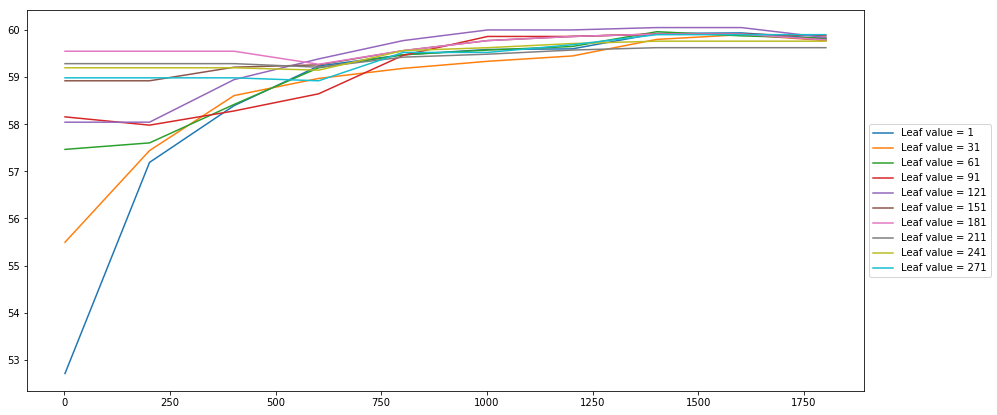

In [39]:
fig = plt.figure(figsize=(15,7))
ax = plt.subplot(111)
for i in range(0, len(data_acc)):
    ax.plot(min_samples_split_values, data_acc[i], label='Leaf value = %a'%min_samples_leaf_values[i])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));

4\. Which configuration returns the best accuracy? What is this accuracy? (Note, if you don't see much variation in the test set accuracy across values of min_samples_split or min_samples_leaf, try redoing the above steps with a different range of values).

In [40]:
flat_list = []
for sublist in data_acc:
    for item in sublist:
        flat_list.append(item)

maximum = flat_list.index(max(flat_list))
print('Max found in elemnt number:', maximum)
print('Which means that is located in our data_acc matrix in:') 
print('-- \'min_samples_leaf_values\' position', int(maximum/10))
print('-- \'min_samples_split_values\' position', int(maximum%10))
print('The accuracyis then:',data_acc[int(maximum/10)][int(maximum%10)])
print('Found at values:')
print('-- \'min_samples_leaf_values\'=', min_samples_leaf_values[int(maximum/10)])
print('-- \'min_samples_split_values\'=', min_samples_split_values[int(maximum%10)])

Max found in elemnt number: 47
Which means that is located in our data_acc matrix in:
-- 'min_samples_leaf_values' position 4
-- 'min_samples_split_values' position 7
The accuracyis then: 60.0476668339
Found at values:
-- 'min_samples_leaf_values'= 121
-- 'min_samples_split_values'= 1402


5\. If you were working for a marketing department, how would you use your churn production model in a real business environment? Explain why churn prediction might be good for the business and how one might improve churn by using this model.

#### Why churn prediction might be good for the business
From a business point of view, churn is a very delicate and important area of research. This becomes obvious when you actually realize that it is inversely proportional to the company earnings, as less costumers lead to less income. 

For this reason, churn prediction is an essential task for every company. Predicting churn can directly lead the business to plan new strategies and act accordingly to make the costumers stay offering personalized features.

#### How one might improve churn by using this model
This model gives you the right tools to both predict how likely a costumer is to churn, and to analyze what were the actual reasons that inclined him/her to decide to churn. Using this predictive model, we could offer price reductions or coupons to those costumers that are more likely to churn because of their low revenue. Also, for those costumers whose outcalls number is low, we could set a plan that offers these costumers new features, or simply remind them our services. As we can see, depending on what prediting value and what particular features we have for a specific costumer, we can plan accordingly and potentially reduce churn by offering personalized assitance/offers. This is a clear example that shows how powerful churn prediction can be, and how it can directly lead to more revenue and success to a company.